<!-- Importing Libraries -->

# Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Importing Dataset

In [76]:
date = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+DateInfo.csv")
transaction = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+Transaction+-+Store.csv")

# Filtering Data

In [77]:
transaction = transaction[transaction["SELL_ID"] == 1070]

In [78]:
transaction['YEAR'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).year
transaction['DATE'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).day

In [79]:
transaction = transaction[transaction["YEAR"] == 2012]

In [80]:
transaction = transaction.reset_index(drop = True)

In [81]:
transaction = transaction.drop(['PRICE', 'SELL_CATEGORY'], axis = 1)


In [82]:
date = date[date["YEAR"] == 2012]

In [83]:
date = date.drop(['CALENDAR_DATE', 'YEAR','IS_SCHOOLBREAK'], axis = 1)

# Merging Datasets

In [84]:
transaction['HOLIDAY'] = date['HOLIDAY']
transaction['IS_WEEKEND'] = date['IS_WEEKEND']
transaction['IS_OUTDOOR'] = date['IS_OUTDOOR']
transaction['AVERAGE_TEMPERATURE'] = date['AVERAGE_TEMPERATURE']

In [85]:
transaction.head()

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
0,01/01/12,46,1070,2012,1,New Year,1,0,24.8
1,01/02/12,70,1070,2012,2,New Year,0,0,24.8
2,01/03/12,62,1070,2012,3,New Year,0,1,32.0
3,01/04/12,88,1070,2012,4,NaN,0,1,32.0
4,01/05/12,104,1070,2012,5,NaN,0,0,24.8


In [86]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        365 non-null    object 
 1   QUANTITY             365 non-null    int64  
 2   SELL_ID              365 non-null    int64  
 3   YEAR                 365 non-null    int64  
 4   DATE                 365 non-null    int64  
 5   HOLIDAY              29 non-null     object 
 6   IS_WEEKEND           365 non-null    int64  
 7   IS_OUTDOOR           365 non-null    int64  
 8   AVERAGE_TEMPERATURE  365 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 25.8+ KB


In [87]:
def bar_plot(variable):
    # get feature
    var = transaction[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

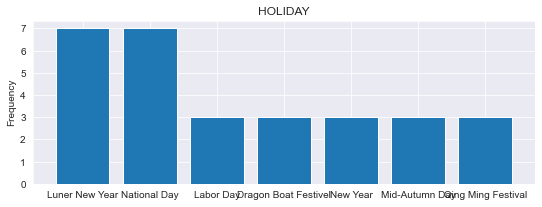

HOLIDAY:
Luner New Year          7
National Day            7
Labor Day               3
Dragon Boat Festivel    3
New Year                3
Mid-Autumn Day          3
Qing Ming Festival      3
Name: HOLIDAY, dtype: int64


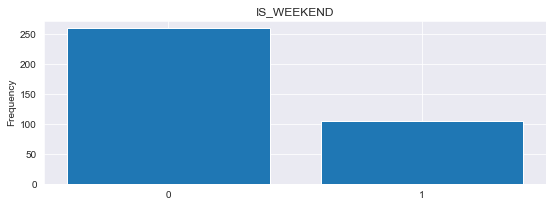

IS_WEEKEND:
0    260
1    105
Name: IS_WEEKEND, dtype: int64


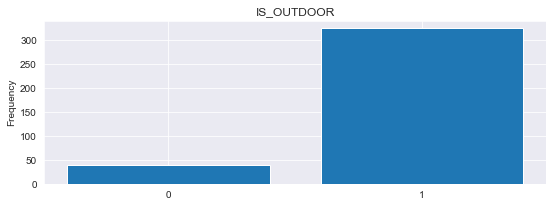

IS_OUTDOOR:
1    325
0     40
Name: IS_OUTDOOR, dtype: int64


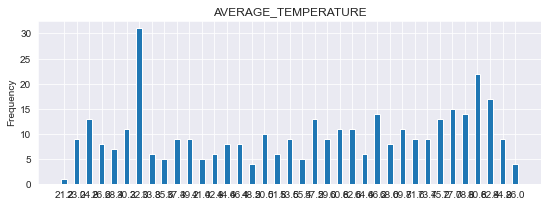

AVERAGE_TEMPERATURE:
32.0    31
80.6    22
82.4    17
77.0    15
66.2    14
78.8    14
57.2    13
24.8    13
75.2    13
30.2    11
62.6    11
60.8    11
69.8    11
50.0    10
53.6     9
23.0     9
59.0     9
84.2     9
37.4     9
71.6     9
73.4     9
39.2     9
26.6     8
46.4     8
44.6     8
68.0     8
28.4     7
64.4     6
42.8     6
51.8     6
33.8     6
35.6     5
55.4     5
41.0     5
86.0     4
48.2     4
21.2     1
Name: AVERAGE_TEMPERATURE, dtype: int64


In [88]:
sns.set_style('darkgrid')
categorical_variables = ['HOLIDAY','IS_WEEKEND','IS_OUTDOOR','AVERAGE_TEMPERATURE']
for c in categorical_variables:
    bar_plot(c)

In [89]:
transaction.dtypes

CALENDAR_DATE           object
QUANTITY                 int64
SELL_ID                  int64
YEAR                     int64
DATE                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_OUTDOOR               int64
AVERAGE_TEMPERATURE    float64
dtype: object

# Basic Data Analysis

In [ ]:
Average stroke rate by gender

In [90]:
transaction[["HOLIDAY","QUANTITY"]].groupby(["HOLIDAY"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,HOLIDAY,QUANTITY
1,Labor Day,63.333333
3,Mid-Autumn Day,61.333333
6,Qing Ming Festival,61.333333
0,Dragon Boat Festivel,60.666667
5,New Year,59.333333
4,National Day,56.571429
2,Luner New Year,54.000000


In [91]:
transaction[["HOLIDAY","QUANTITY"]].groupby(["HOLIDAY"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,HOLIDAY,QUANTITY
1,Labor Day,63.333333
3,Mid-Autumn Day,61.333333
6,Qing Ming Festival,61.333333
0,Dragon Boat Festivel,60.666667
5,New Year,59.333333
4,National Day,56.571429
2,Luner New Year,54.000000
